# Ejercicio 10 - guía 7

Se toma una muestra de 𝑛 películas y se registra su duración en minutos. La duración promedio
de las 𝑛 películas es 𝑦¯ = 125 minutos. Asumir que las duraciones están distribuidas normalmente
con media 𝜃 desconocida y desvío estándar 20 minutos. Suponer un prior normal para 𝜃 con media
100 y desvío estándar 40.

## a)
Obtener la distribución posterior para 𝜃 (en función de 𝑛).

### Desarrollo

Para obtener la distribución posterior de 𝜃 en función de n, primero me planteo hacer los cálculos en general y luego 
la obtengo para el caso particular de este ejercicio. A continuación dejo imágenes con los cálculos:

![Calculos posterior en funcion de n parte 1](../../imagenes/ejercicio_10_guia7_pt1.jpg)
![Calculos posterior en funcion de n parte 2](../../imagenes/ejercicio_10_guia7_pt2.jpg)

## b)
Se incluye una nueva película a la muestra, con una duración 𝑦˜. Obtener la distribución
posterior predictiva para 𝑦˜ (en función de 𝑛).

### Desarrollo

La distribución posterior predictiva de $\tilde{y}$ se obtiene integrando sobre la incertidumbre de $\theta$. Dado que la posterior de $\theta$ es normal, la distribución posterior predictiva también es normal, con:

$$p(\tilde{y} | y) \sim \mathcal{N} \left( \mu_n, \sigma_n^2 + \sigma_y^2 \right)$$

En donde:

* $\mu_n$ y $\sigma_n^2$ son los parámetros de la distribución posterior de $\theta$ (que obtuvimos en el inciso anterior).

* $\sigma_y^2$ es la varianza de la muestra, que en este caso sabemos que es $20^2$.

## c)
Para 𝑛 = 10, graficar las distribuciones obtenidas en (𝑎) y (𝑏) y dar un intervalo de probabilidad posterior de 95% para 𝜃 y para $\tilde{y}$

### Desarrollo

Primero defino los datos que fueron dados en el enunciado principal:

In [1]:
duracion_promedio = 125
cantidad_peliculas = 10
desvio_estandar_duracion = 20
mu_prior = 100
sigma_prior = 40

Ahora obtengo la posterior y posterior predictiva que obtuvimos antes:

In [3]:
import numpy as np
from scipy.stats import norm 

# Grilla de valores
grilla_valores = np.linspace(80, 170, 500)

# Posterior
mu_posterior = (mu_prior / sigma_prior**2 + duracion_promedio * cantidad_peliculas / desvio_estandar_duracion**2) / (1 / sigma_prior**2 + cantidad_peliculas / desvio_estandar_duracion**2)
sigma_posterior = np.sqrt(1 / (1 / sigma_prior**2 + cantidad_peliculas / desvio_estandar_duracion**2))
posterior = norm.pdf(grilla_valores, mu_posterior, sigma_posterior)

# Posterior predictiva
mu_posterior_predictiva = mu_posterior
sigma_posterior_predictiva = np.sqrt(desvio_estandar_duracion**2 + sigma_posterior**2)
posterior_predictiva = norm.pdf(grilla_valores, mu_posterior_predictiva, sigma_posterior_predictiva)

Y finalmente hago el gráfico:

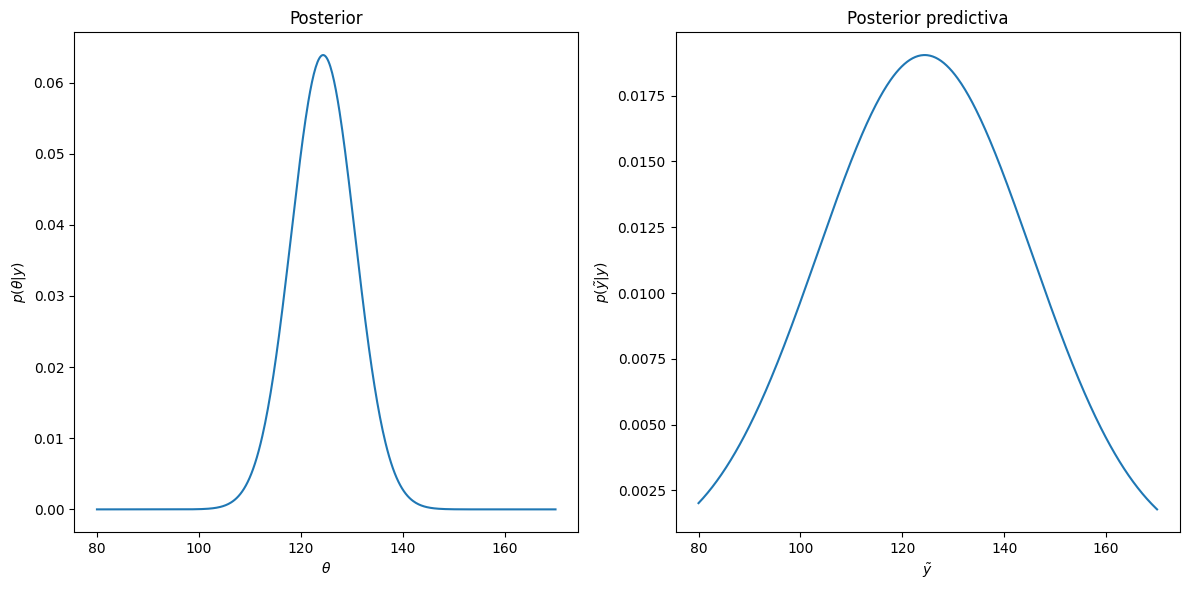

In [9]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].plot(grilla_valores, posterior)
ax[0].set_title('Posterior')
ax[0].set_xlabel(r'$\theta$')
ax[0].set_ylabel(r'$p(\theta|y)$')

ax[1].plot(grilla_valores, posterior_predictiva)
ax[1].set_title('Posterior predictiva')
ax[1].set_xlabel(r'$\tilde{y}$')
ax[1].set_ylabel(r'$p(\tilde{y} | y)$')

plt.tight_layout()
plt.show()

Ahora doy el intervalo de probabilidad de 95$ para $\theta$ y para $\tilde{y}$:

In [12]:
intervalo_credibilidad_posterior = mu_posterior + sigma_posterior * np.array([-1.96, 1.96])
intervalo_credibilidad_posterior_predictiva = mu_posterior_predictiva + sigma_posterior_predictiva * np.array([-1.96, 1.96])

print(f'Intervalo de probabilidad de 95$ para 𝜃: {intervalo_credibilidad_posterior}')
print(f'Intervalo de probabilidad de 95$ para la nueva muestra: {intervalo_credibilidad_posterior_predictiva}')

Intervalo de probabilidad de 95$ para 𝜃: [112.14622097 136.63426683]
Intervalo de probabilidad de 95$ para la nueva muestra: [ 83.32254251 165.45794529]


## d)
Repetir el item anterior para distintos 𝑛 y ver cómo se modifica la posterior.

### Desarrollo

Me armo una función para ver la comparativa:

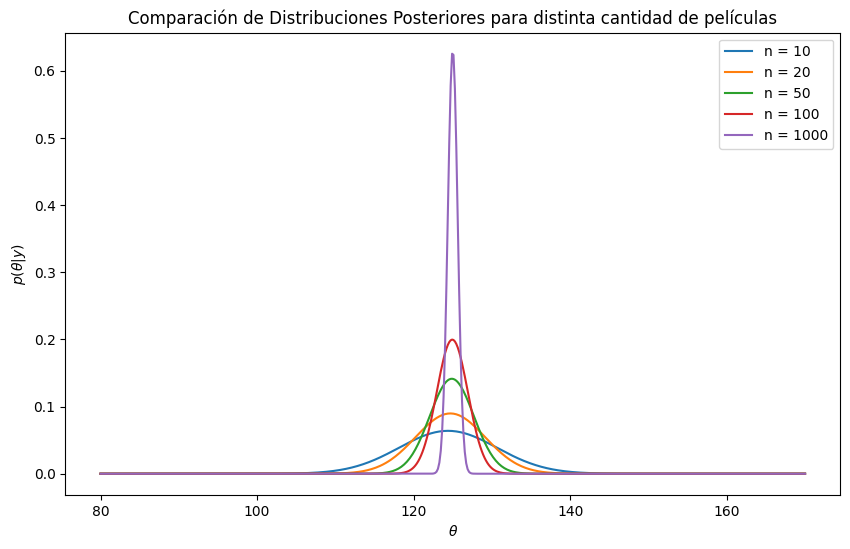

In [13]:
def graficar_posterior_en_funcion_de_n(lista_n: list[int]):
    
    x = np.linspace(0, 1, 1000)
    plt.figure(figsize=(10, 6))

    for n in lista_n:

        mu_posterior = (mu_prior / sigma_prior**2 + duracion_promedio * n / desvio_estandar_duracion**2) / (1 / sigma_prior**2 + n / desvio_estandar_duracion**2)
        sigma_posterior = np.sqrt(1 / (1 / sigma_prior**2 + n / desvio_estandar_duracion**2))
        posterior = norm.pdf(grilla_valores, mu_posterior, sigma_posterior)
        
        plt.plot(grilla_valores, posterior, label=f'n = {n}')
        
    plt.xlabel(r'$\theta$')
    plt.ylabel(r'$p(\theta|y)$')
    plt.title('Comparación de Distribuciones Posteriores para distinta cantidad de películas')
    plt.legend()
    plt.show()
    
graficar_posterior_en_funcion_de_n([10, 20, 50, 100, 1000])

## e)
¿Cuánto tiene que valer 𝜏0 para que el prior tenga exactamente el mismo peso en la posterior
que haber agregado a la muestra una nueva película de duración 100 minutos?

### Desarrollo

Sabemos que las ecuaciones que describen la media y varianza de la posterior para prior conjugado son de la forma:

$$\mu_n = \frac{\mu_0 / \tau_0^2 + n (\bar{y} / \sigma^2)}{1 / \tau_0^2 + n / \sigma^2}$$

$$\sigma_n^2 = \frac{1}{1 / \tau_0^2 + n / \sigma^2}$$

En nuestro caso tenemos que:

* $\mu_0 = 100$ es la media del prior, ya que se dice que quiere añadirse una película de duración 100 minutos.
* $\bar{y} = 125$ es la media de las muestras.
* $\sigma = 20$ es la desviación estándar de la distribución de las muestras.

Y $\tau_0$ es lo que queremos determinar. Si reemplazamos los datos que tenemos y dejamos a $\tau_0$ como variable tenemos que:

$$\mu_n = \frac{100 / \tau_0^2 + n (125 / 20^2)}{1 / \tau_0^2 + n / 20^2}$$

$$\sigma_n^2 = \frac{1}{1 / \tau_0^2 + n / 20^2}$$

Entonces ahora podemos ver que lo único que necesitamos para que la fracción se "unifique" y tenga este efecto de haber añadido una nueva película
de duración 100 minutos, **es que $\tau_0$ sea igual a 20**.